<a href="https://colab.research.google.com/github/zicarelli/cs480student/blob/main/04/CS480_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

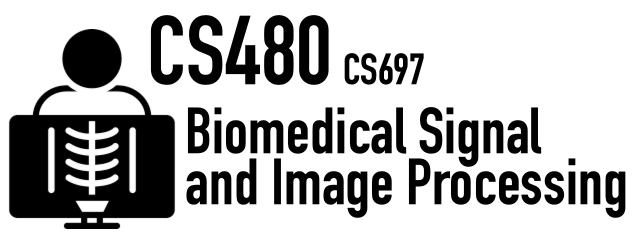
#Assignment 4

In [50]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia!

In [51]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [52]:
# we are using mahotas again, so lets install it!
!pip install mahotas

In [53]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [54]:
# Please download this file: https://cs480.org/data/xray.zip
# This is a subset of the Kaggle Pneumonia Dataset!
#
# TODO: Upload xray.zip using the file panel on the left.

In [55]:
# Run this code to extract the zip file and to create
# the folder structure of normal/ and pneumonia/ images.
# Each folder contains the first images of the Kaggle dataset.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'

In [56]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [57]:
# TODO: Please display this image and print the dimensions!

(1858, 2090)

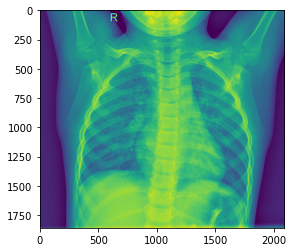

In [58]:
# Display the first image from the normal dataset:
imshow(img)

# Print the dimensions of the image:
img.shape

# Image is 1858 pixels tall by 2000 pixels wide.

**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [59]:
# This code loads all normal images into a numpy array.
normal_files = os.listdir( NORMAL_DIR )

normal_images = np.zeros( (len(normal_files), 300, 300), dtype=np.float32)

for i in range(len(normal_files)):
  loaded_image = mh.imread( NORMAL_DIR + normal_files[i], as_grey=True )

  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  normal_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [60]:
# This code loads all pneumonia images into a numpy array.
pneumonia_files = os.listdir( PNEUMONIA_DIR )

pneumonia_images = np.zeros( (len(pneumonia_files), 300, 300), dtype=np.float32)

for i in range(len(pneumonia_files)):
  loaded_image = mh.imread( PNEUMONIA_DIR + pneumonia_files[i], as_grey=True )
  
  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [61]:
# The two code blocks above perform 2 data wrangling operations.
# Which ones?
# Hint: The first one might be more obvious but the second one happens in the
# last line of each block.
# Operation 1) Images are rezised to 300 x 300 pixels.
# Operation 2) Images are loaded into 3d array where the first dimension
#   is the index of the image and the last two are the 2d image data.

In [62]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

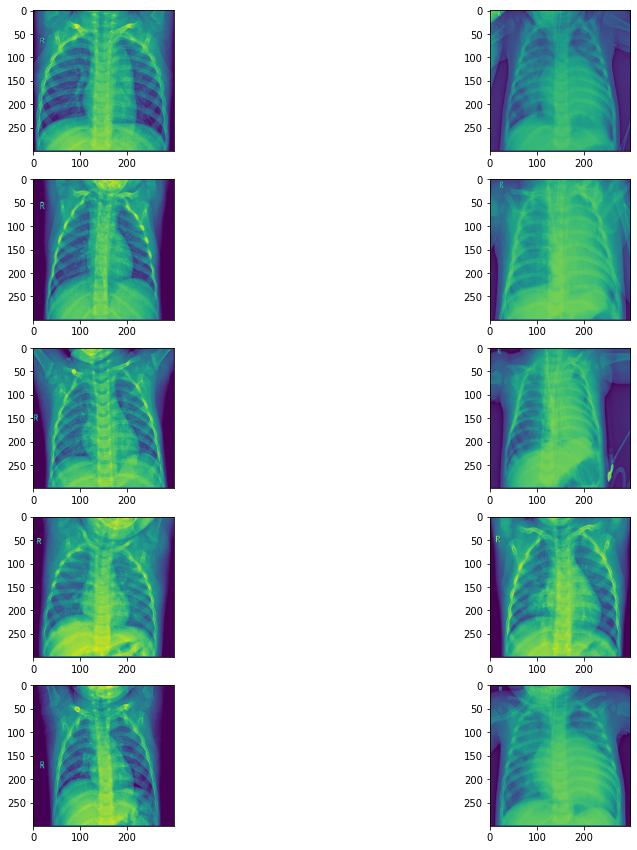

In [63]:
# Plot first five images of the normal (left) and pheumonia (right) sets.
f, sp = plt.subplots(5, 2, figsize=(15, 15))
for i in range(5):
  sp[i, 0].imshow(normal_images[i])
  sp[i, 1].imshow(pneumonia_images[i])

**Task 3:** Setup training and testing data. [15 Points]

In [64]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays and pneumonia xrays.
#
# The training data will include 120 images (60 normal, 60 pneumonia).
# The testing data will include the remaining 80 images (40 normal, 40 pneumonia).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the training_target vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia.

In [65]:
TRAINING_COUNT = 60

training_data = np.zeros( (TRAINING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[0:TRAINING_COUNT] ):
  training_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[0:TRAINING_COUNT] ):
  training_data[i + TRAINING_COUNT] = p.ravel()

In [66]:
# Create the training_target vector with 0 for a normal image, and
# 1 for a pneumonia:
training_target = [0] * TRAINING_COUNT + [1] * TRAINING_COUNT

In [67]:
TESTING_COUNT = 40

testing_data = np.zeros( (TESTING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i + TESTING_COUNT] = p.ravel()

In [68]:
# Create the testing_target vector with 0 for a normal image, and
# 1 for a pneumonia:
testing_target = [0] * TESTING_COUNT + [1] * TESTING_COUNT

**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [69]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [70]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia.
fitted = clf.fit( training_data, training_target )

In [71]:
# In just a few sentences, please explain how the Random Forest works.

In [72]:
# The random forest classifier creates a decision tree from each of random
# training samples.  (This reflects its name: a forest is many trees, which in
# this case were randomly selected.)  This forest of decision trees then each
# vote on the best predictive attributes for the classes being classified, which
# in this case are normal lungs or lungs suffering from pneumonia.

In [73]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( testing_data, testing_target )

0.9375

In [74]:
# Is the classification accuracy good? And, are you surprised?

In [75]:
# The accuracy score is 93.8%!  This score seems surprisingly good for a class
# assignment given the limited sample size (only 120 training images)!  I'm
# actually quite impressed.  It is prehaps not good enough for a clinical
# setting where accuracy matters for human health outcomes where a false
# negative diagnosis could have serious concequences, but it really seems like
# an impressive starting point.

**Bonus:** Let's take a closer look! [33 Points]

In [76]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(testing_data) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

In [77]:
# TODO: YOUR CODE AND YOUR ANSWER

In [78]:
# TODO: How can we improve the classification performance?
# Hint: Ideas without code are fine as well.

In [79]:
# TODO: YOUR ANSWER

In [80]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw